# Machine Learning (revenue_prediction)

In [1]:
# Packages / libraries
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import json
import datetime as dt

## Loading the Raw Data

In [2]:
# Loading the data

with open(r"C:\Users\user\Downloads\accounton_data.json\accounton_data.json",'r') as f:
    raw_data = json.loads(f.read())

In [3]:
# Flatten data
data = pd.json_normalize(raw_data)


In [4]:
print(data.dtypes)

company_name         object
nace_code            object
vat_number           object
zipcode               int64
city                 object
                     ...   
staff_costs.2019    float64
staff_costs.2018    float64
staff_costs.2016    float64
staff_costs.2017    float64
staff_costs.2015    float64
Length: 75, dtype: object


# Data Preprocessing

In [5]:
# convert the CreationDate column into DateTime type Delet the companies the created after 2019 because it had many NaN values
data['creation_date'] = pd.to_datetime(data['creation_date']).dt.to_period('Y')

##  Checking for NULL Values

In [6]:
# Checking for null values
data.isnull().sum()

company_name            0
nace_code               0
vat_number              0
zipcode                 0
city                    0
                    ...  
staff_costs.2019    31132
staff_costs.2018    31569
staff_costs.2016    32485
staff_costs.2017    33830
staff_costs.2015    23800
Length: 75, dtype: int64

In [7]:
df1 = data[data['ebit.2019'].notna()]
df1

,company_name,nace_code,vat_number,zipcode,city,creation_date,legal_form,company_category,province,ebit.2020,...,net_added_value.2018,net_added_value.2017,net_added_value.2016,net_added_value.2015,staff_costs.2020,staff_costs.2019,staff_costs.2018,staff_costs.2016,staff_costs.2017,staff_costs.2015
1,THE CONTENT MAKERS,82300,BE0685384578,9831,DEURLE,2017,Private company with limited liability,Small,East-Flanders,-5340.0,...,7800.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,NEW REUBENS SPORT,47785,BE0506833512,8340,SIJSELE,2014,Private company with limited liability,Small,West-Flanders,-1186.0,...,33493.0,74107.0,61687.0,73463.0,7140.0,27664.0,33445.0,34954.0,32223.0,31226.0
3,DIEVERTECH,33120,BE0538788775,8490,ZERKEGEM,2013,Private company,Small,West-Flanders,62157.0,...,66483.0,43259.0,63538.0,55781.0,NaN,NaN,NaN,0.0,NaN,0.0
5,VICI,68311,BE0445074503,9250,WAASMUNSTER,1991,Private company,Medium sized,East-Flanders,-256848.0,...,-263146.0,-73284.0,456403.0,1391143.0,161498.0,159134.0,244171.0,195954.0,430706.0,300393.0
6,KB RENO - CLEANING,81220,BE0542452506,2990,LOENHOUT,2013,Private company with limited liability,Small,Antwerp,16242.0,...,NaN,-990.0,NaN,NaN,12847.0,15676.0,8157.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,GARAGE OZCAR,45201,BE0696638558,3500,HASSELT,2018,Private company with limited liability,Small,Limburg,7117.0,...,82293.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
50000,DR. MARC VANDIJCK,86210,BE0449101981,3440,BUDINGEN,1992,Private company with limited liability,Small,Vlaams Brabant,87659.0,...,85241.0,74981.0,108957.0,58415.0,0.0,0.0,0.0,0.0,0.0,0.0
50001,DIGITAL MUSIC PRINT,58190,BE0442726905,2600,BERCHEM-ANTWERPEN,1991,Private company,Small,Antwerp,154419.0,...,58486.0,130376.0,62800.0,49169.0,0.0,0.0,NaN,NaN,NaN,0.0
50002,ASCO,68203,BE0687778203,3391,MEENSEL-KIEZEGEM,2018,Private company with limited liability,Small,Vlaams Brabant,175190.0,...,60594.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


## Checking for the duplicated values

In [8]:
# checking the duplicated company
bool_series = data.duplicated()
bool_series

0        False
1        False
2        False
3        False
4        False
         ...  
49999    False
50000    False
50001    False
50002    False
50003    False
Length: 50004, dtype: bool

In [9]:
df1.columns

Index(['company_name', 'nace_code', 'vat_number', 'zipcode', 'city',
       'creation_date', 'legal_form', 'company_category', 'province',
       'ebit.2020', 'ebit.2019', 'ebit.2018', 'ebit.2017', 'ebit.2016',
       'ebit.2015', 'ebitda.2020', 'ebitda.2019', 'ebitda.2018', 'ebitda.2017',
       'ebitda.2016', 'ebitda.2015', 'profit_and_loss_after_taxes.2020',
       'profit_and_loss_after_taxes.2019', 'profit_and_loss_after_taxes.2018',
       'profit_and_loss_after_taxes.2017', 'profit_and_loss_after_taxes.2016',
       'profit_and_loss_after_taxes.2015', 'total_assets.2020',
       'total_assets.2019', 'total_assets.2018', 'total_assets.2017',
       'total_assets.2016', 'total_assets.2015', 'total_liabilities.2020',
       'total_liabilities.2019', 'total_liabilities.2018',
       'total_liabilities.2017', 'total_liabilities.2016',
       'total_liabilities.2015', 'operating_profit_and_loss.2020',
       'operating_profit_and_loss.2019', 'operating_profit_and_loss.2018',
       'o

## Selecting the important features

### Heatmap

- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation matrix
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded

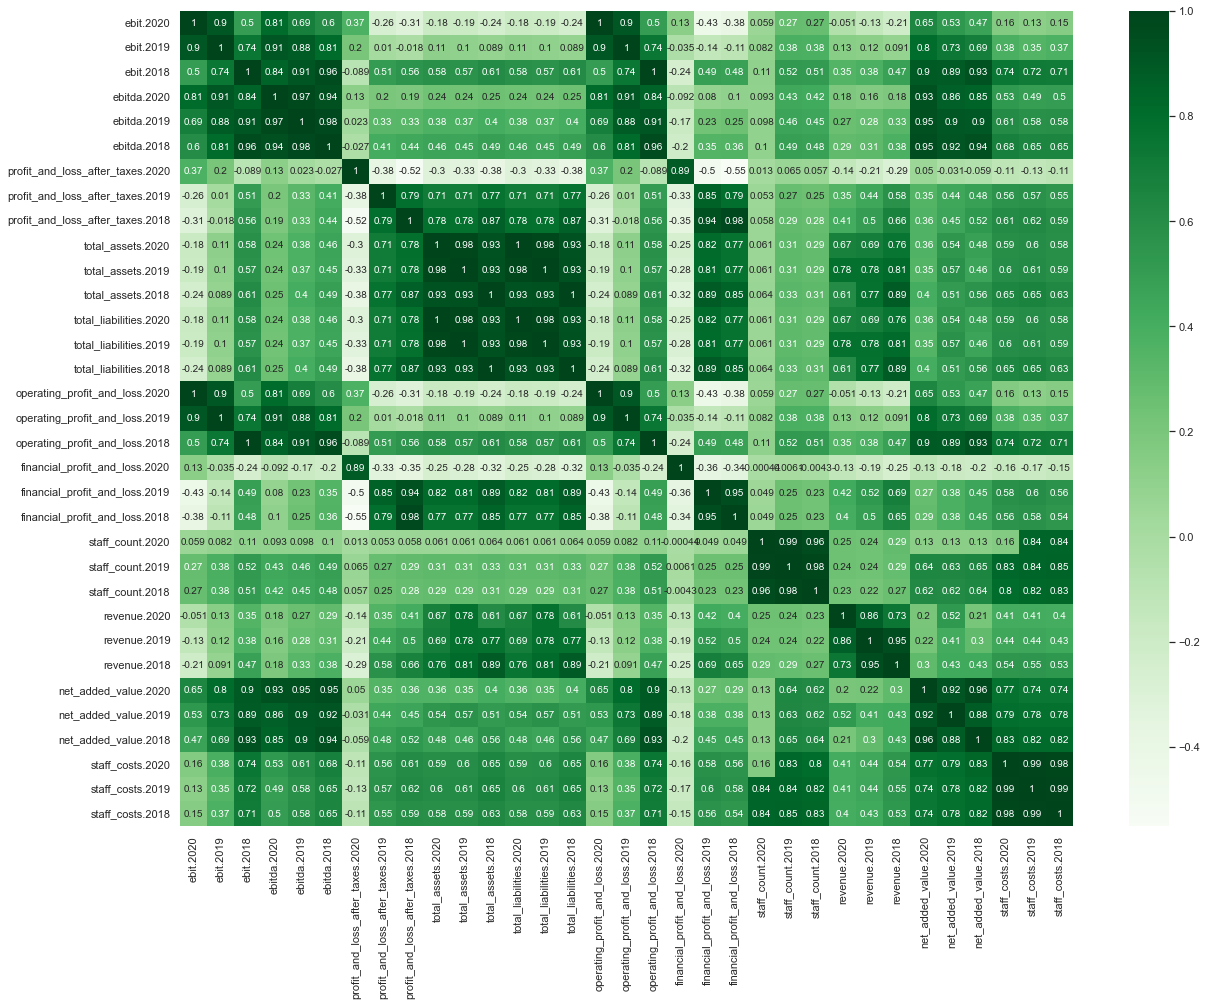

In [79]:
#  Heatmap for the years (2020, 2019, 2018)
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(20,15)})

#selecting the columns that I want to check the correlation between them
n_variables = ['ebit.2020', 'ebit.2019', 'ebit.2018',
       'ebitda.2020', 'ebitda.2019', 'ebitda.2018',
       'profit_and_loss_after_taxes.2020','profit_and_loss_after_taxes.2019', 'profit_and_loss_after_taxes.2018',
       'total_assets.2020','total_assets.2019', 'total_assets.2018', 
       'total_liabilities.2020', 'total_liabilities.2019', 'total_liabilities.2018',
       'operating_profit_and_loss.2020','operating_profit_and_loss.2019', 'operating_profit_and_loss.2018',
       'financial_profit_and_loss.2020', 'financial_profit_and_loss.2019', 'financial_profit_and_loss.2018',
       'staff_count.2020','staff_count.2019', 'staff_count.2018',
       'revenue.2020', 'revenue.2019', 'revenue.2018',
       'net_added_value.2020', 'net_added_value.2019', 'net_added_value.2018',
       'staff_costs.2020', 'staff_costs.2019', 'staff_costs.2018']

# creating the correlation dataset using Pearson method (linear relation)
pc = df1[n_variables].corr(method ='pearson')

cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Greens")

In [11]:
pc

,ebit.2020,ebit.2019,ebit.2018,ebitda.2020,ebitda.2019,ebitda.2018,profit_and_loss_after_taxes.2020,profit_and_loss_after_taxes.2019,profit_and_loss_after_taxes.2018,total_assets.2020,...,staff_count.2018,revenue.2020,revenue.2019,revenue.2018,net_added_value.2020,net_added_value.2019,net_added_value.2018,staff_costs.2020,staff_costs.2019,staff_costs.2018
ebit.2020,1.000000,0.903679,0.499174,0.808823,0.690397,0.602511,0.373071,-0.256235,-0.305102,-0.175667,...,0.271902,-0.051345,-0.134113,-0.211587,0.647867,0.527976,0.469888,0.164130,0.126023,0.152003
ebit.2019,0.903679,1.000000,0.742888,0.906987,0.880418,0.810090,0.204288,0.010015,-0.017903,0.110523,...,0.381887,0.133953,0.123481,0.091354,0.800199,0.730186,0.693037,0.384340,0.348487,0.371082
ebit.2018,0.499174,0.742888,1.000000,0.844991,0.909267,0.959995,-0.089192,0.507752,0.556103,0.578817,...,0.511687,0.350487,0.378021,0.474463,0.896720,0.890659,0.928355,0.743202,0.720927,0.713158
ebitda.2020,0.808823,0.906987,0.844991,1.000000,0.974691,0.942136,0.125028,0.196804,0.185714,0.240694,...,0.421105,0.183830,0.160645,0.182830,0.934762,0.860749,0.846402,0.527303,0.491986,0.501268
ebitda.2019,0.690397,0.880418,0.909267,0.974691,1.000000,0.981522,0.023483,0.326684,0.328088,0.375089,...,0.447859,0.266700,0.281905,0.327718,0.945241,0.903872,0.902647,0.607412,0.576907,0.582767
ebitda.2018,0.602511,0.810090,0.959995,0.942136,0.981522,1.000000,-0.027385,0.410152,0.435622,0.458129,...,0.478339,0.292479,0.305291,0.380117,0.951700,0.920117,0.941393,0.679559,0.652022,0.650165
profit_and_loss_after_taxes.2020,0.373071,0.204288,-0.089192,0.125028,0.023483,-0.027385,1.000000,-0.379487,-0.518027,-0.303803,...,0.056644,-0.135838,-0.206988,-0.286408,0.049765,-0.030926,-0.059374,-0.111960,-0.129195,-0.107093
profit_and_loss_after_taxes.2019,-0.256235,0.010015,0.507752,0.196804,0.326684,0.410152,-0.379487,1.000000,0.792800,0.713159,...,0.252860,0.352835,0.442278,0.575605,0.350862,0.437300,0.484461,0.561176,0.572057,0.545461
profit_and_loss_after_taxes.2018,-0.305102,-0.017903,0.556103,0.185714,0.328088,0.435622,-0.518027,0.792800,1.000000,0.782710,...,0.276060,0.408586,0.502487,0.661521,0.363528,0.450027,0.523438,0.611523,0.620355,0.591131
total_assets.2020,-0.175667,0.110523,0.578817,0.240694,0.375089,0.458129,-0.303803,0.713159,0.782710,1.000000,...,0.289088,0.666972,0.691641,0.755068,0.362944,0.542373,0.480116,0.593381,0.603024,0.584233


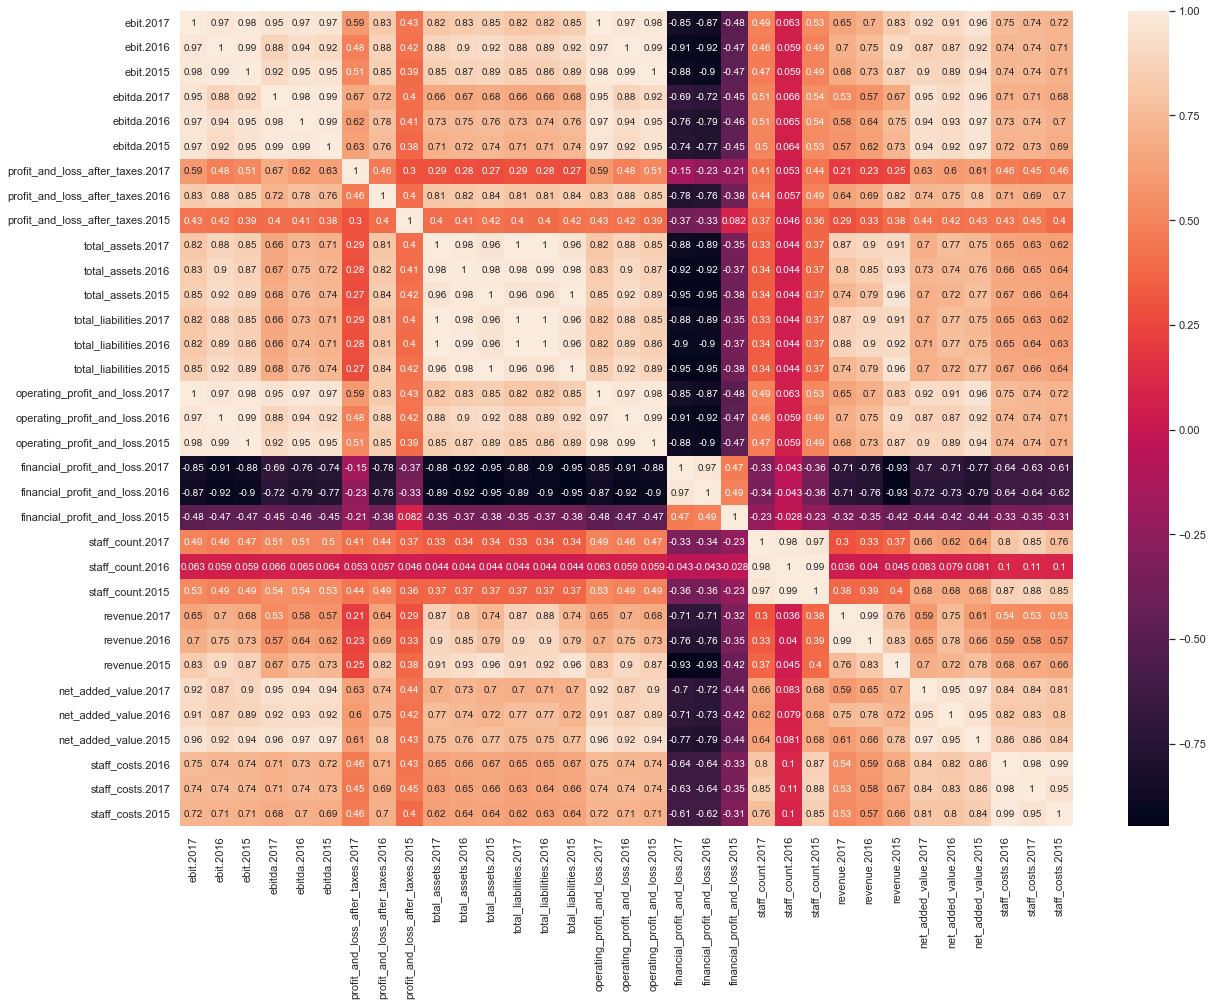

In [12]:
#  Heatmap for the years (2017,2016,2015)

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(20,15)})

# selecting the columns that I want to check the correlation between them
n_variables = ['ebit.2017', 'ebit.2016', 'ebit.2015',
       'ebitda.2017', 'ebitda.2016', 'ebitda.2015',
       'profit_and_loss_after_taxes.2017', 'profit_and_loss_after_taxes.2016','profit_and_loss_after_taxes.2015',
       'total_assets.2017', 'total_assets.2016', 'total_assets.2015',
       'total_liabilities.2017', 'total_liabilities.2016','total_liabilities.2015',
       'operating_profit_and_loss.2017', 'operating_profit_and_loss.2016', 'operating_profit_and_loss.2015',
       'financial_profit_and_loss.2017', 'financial_profit_and_loss.2016','financial_profit_and_loss.2015',
       'staff_count.2017', 'staff_count.2016', 'staff_count.2015',
       'revenue.2017', 'revenue.2016', 'revenue.2015',
       'net_added_value.2017', 'net_added_value.2016', 'net_added_value.2015',
       'staff_costs.2016', 'staff_costs.2017', 'staff_costs.2015']
       
# creating the correlation dataset using Pearson method (linear relation)
pc = df1[n_variables].corr(method ='pearson')

cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 )

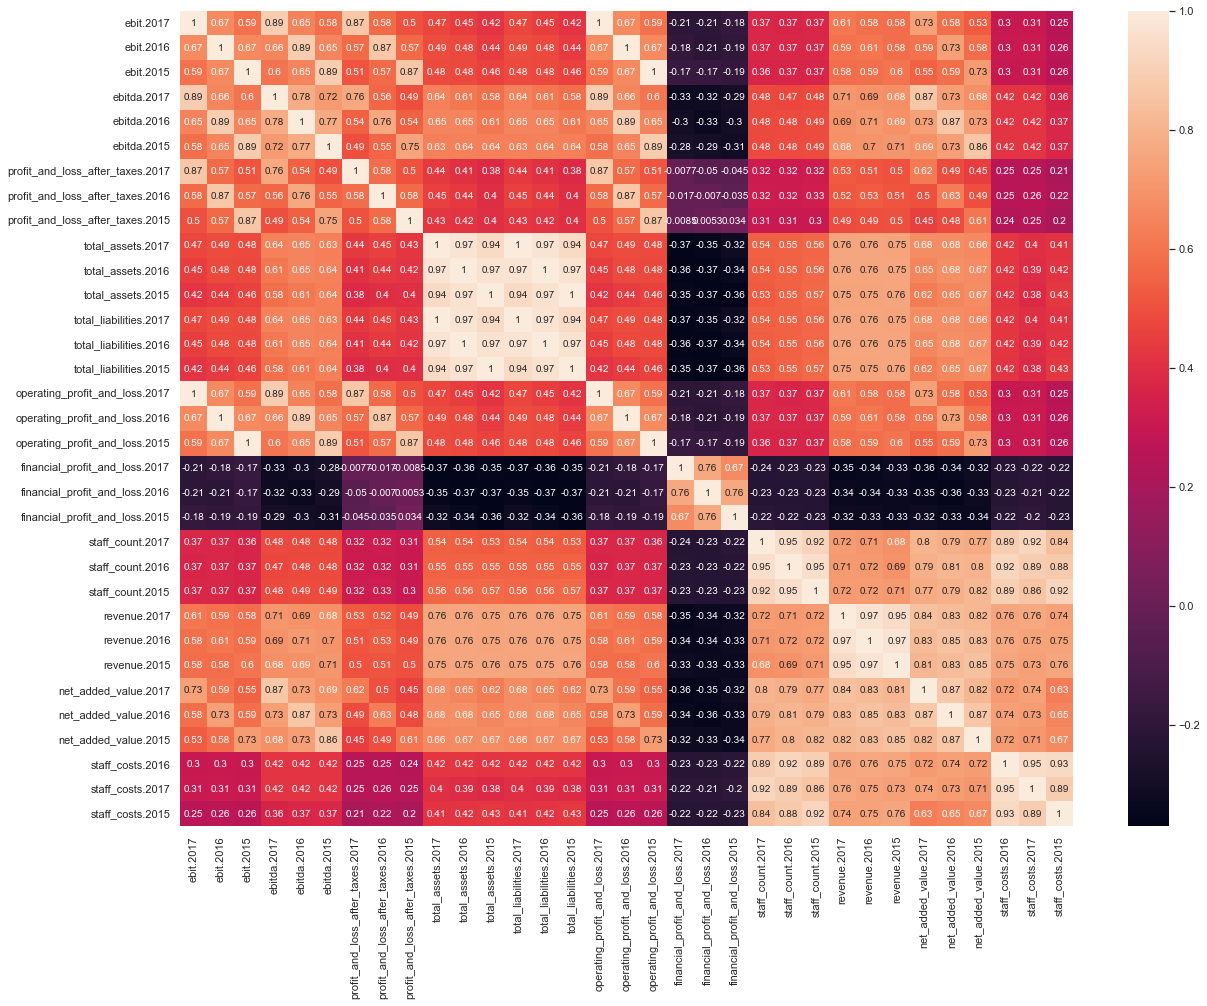

In [13]:
#  Heatmap for the years (2017,2016,2015) , using spearman method
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(20,15)})

# selecting the columns that I want to check the correlation between them
n_variables = ['ebit.2017', 'ebit.2016', 'ebit.2015',
       'ebitda.2017', 'ebitda.2016', 'ebitda.2015',
       'profit_and_loss_after_taxes.2017', 'profit_and_loss_after_taxes.2016','profit_and_loss_after_taxes.2015',
       'total_assets.2017', 'total_assets.2016', 'total_assets.2015',
       'total_liabilities.2017', 'total_liabilities.2016','total_liabilities.2015',
       'operating_profit_and_loss.2017', 'operating_profit_and_loss.2016', 'operating_profit_and_loss.2015',
       'financial_profit_and_loss.2017', 'financial_profit_and_loss.2016','financial_profit_and_loss.2015',
       'staff_count.2017', 'staff_count.2016', 'staff_count.2015',
       'revenue.2017', 'revenue.2016', 'revenue.2015',
       'net_added_value.2017', 'net_added_value.2016', 'net_added_value.2015',
       'staff_costs.2016', 'staff_costs.2017', 'staff_costs.2015']
       
# creating the correlation dataset using spearman method 
pc = df1[n_variables].corr(method ='spearman')

cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 )

In [15]:
# selecting the features based on the heatmap result 
new_df = df1.drop(['ebit.2020', 'ebit.2019', 'ebit.2018', 'ebit.2017', 'ebit.2016',
       'ebit.2015', 'ebitda.2020', 'ebitda.2019', 'ebitda.2018', 'ebitda.2017',
       'ebitda.2016', 'ebitda.2015', 'profit_and_loss_after_taxes.2020',
       'profit_and_loss_after_taxes.2019', 'profit_and_loss_after_taxes.2018',
       'profit_and_loss_after_taxes.2017', 'profit_and_loss_after_taxes.2016',
       'profit_and_loss_after_taxes.2015', 'financial_profit_and_loss.2020',
       'financial_profit_and_loss.2019', 'financial_profit_and_loss.2018',
       'financial_profit_and_loss.2017', 'financial_profit_and_loss.2016',
       'financial_profit_and_loss.2015', 'staff_count.2020',
       'staff_count.2019', 'staff_count.2018', 'staff_count.2017',
       'staff_count.2016', 'staff_count.2015','net_added_value.2020', 'net_added_value.2019', 'net_added_value.2018',
       'net_added_value.2017', 'net_added_value.2016', 'net_added_value.2015',
       'staff_costs.2020', 'staff_costs.2019', 'staff_costs.2018',
       'staff_costs.2016', 'staff_costs.2017', 'staff_costs.2015'], axis=1)


In [80]:
# Create a subset from df1 to check the method of cleaning data
new_df2 = new_df.iloc[0:10000,:]
# new_df2

In [93]:
# Investigate all the elements whithin each Feature 

for column in new_df2:
    unique_vals = np.unique(new_df2[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature company_name :9982
The number of values for feature nace_code :642
The number of values for feature vat_number :10000
The number of values for feature zipcode :498
The number of values for feature city :933
The number of values for feature creation_date :70
The number of values for feature legal_form :2 -- ['Private company' 'Private company with limited liability']
The number of values for feature company_category :4 -- ['Large' 'Medium sized' 'Small' 'Very large']
The number of values for feature province :5 -- ['Antwerp' 'East-Flanders' 'Limburg' 'Vlaams Brabant' 'West-Flanders']
The number of values for feature total_assets.2020 :9921
The number of values for feature total_assets.2019 :9924
The number of values for feature total_assets.2018 :9474
The number of values for feature total_assets.2017 :7425
The number of values for feature total_assets.2016 :6941
The number of values for feature total_assets.2015 :6757
The number of values for feature to

In [74]:
# splitting the data frame based on 'company_category'
df_Large = new_df2.loc[new_df2['company_category']== "Large",:]
df_Medium = new_df2.loc[new_df2['company_category']== 'Medium sized',:]
df_Small = new_df2.loc[new_df2['company_category']== 'Small',:]
df_Very_large= new_df2.loc[new_df2['company_category']== 'Very large',:]


In [77]:
# fill the NAN values in each feature based on the mean values of the same category
df_Large['total_assets.2019'][df_Large['total_assets.2019'].isna()] = df_Large['total_assets.2019'].mean()
df_Large['total_assets.2020'][df_Large['total_assets.2020'].isna()] = df_Large['total_assets.2020'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_15484\1907107708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Large['total_assets.2015'][df_Large['total_assets.2015'].isna()] = df_Large['total_assets.2015'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_15484\1907107708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Large['total_assets.2015'][df_Large['total_assets.2015'].isna()] = df_Large['total_assets.2015'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_15484\1907107708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [94]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_Large , title="Revenue Profiling Report")
# profile.to_file("Revenue Profiling Report.html")

In [92]:
# creating the dataframe for the last two years
df_two_years = pd.DataFrame()
rest_f = ['company_name', 'nace_code', 'vat_number', 'zipcode', 'city',
       'creation_date', 'legal_form', 'company_category', 'province',]
for i in rest_f:
     df_two_years[i]=df1[i]

years = ['2019','2020']
Features = ['ebit', 'ebitda' , 'profit_and_loss_after_taxes' , 'total_assets' , 'total_liabilities' , 'operating_profit_and_loss' , 'financial_profit_and_loss' , 'staff_count', 'revenue' , 'net_added_value' , 'staff_costs']
for feature in Features:
    for year in years:
        df_two_years[f'{feature}.{year}'] = df1[f'{feature}.{year}']


# df_two_years

In [95]:
# Investigate all the elements whithin each Feature 

for column in df_two_years:
    unique_vals = np.unique(df_two_years[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature company_name :38071
The number of values for feature nace_code :812
The number of values for feature vat_number :38322
The number of values for feature zipcode :516
The number of values for feature city :1067
The number of values for feature creation_date :92
The number of values for feature legal_form :2 -- ['Private company' 'Private company with limited liability']
The number of values for feature company_category :4 -- ['Large' 'Medium sized' 'Small' 'Very large']
The number of values for feature province :5 -- ['Antwerp' 'East-Flanders' 'Limburg' 'Vlaams Brabant' 'West-Flanders']
The number of values for feature ebit.2019 :33380
The number of values for feature ebit.2020 :33961
The number of values for feature ebitda.2019 :34408
The number of values for feature ebitda.2020 :34572
The number of values for feature profit_and_loss_after_taxes.2019 :32285
The number of values for feature profit_and_loss_after_taxes.2020 :33131
The number of values for 

In [96]:
# Create a subset from df1 to check the method of cleaning data
new_two_years = df_two_years.iloc[0:10000,:]

In [97]:
# splitting the data frame based on 'company_category'
df_NLarge = new_two_years.loc[new_two_years['company_category']== "Large",:]
df_NMedium = new_two_years.loc[new_two_years['company_category']== 'Medium sized',:]
df_NSmall = new_two_years.loc[new_two_years['company_category']== 'Small',:]
df_NVery_large= new_two_years.loc[new_two_years['company_category']== 'Very large',:]

In [105]:
# fill the NAN values in each feature based on the mean values of the same category
years = ['2019','2020']
Features = ['ebit', 'ebitda' , 'profit_and_loss_after_taxes' , 'total_assets' , 'total_liabilities' , 'operating_profit_and_loss' , 'financial_profit_and_loss' , 'staff_count', 'revenue' , 'net_added_value' , 'staff_costs']
for feature in Features:
    for year in years:
        df_NLarge[f'{feature}.{year}'][df_NLarge[f'{feature}.{year}'].isna()] = df_NLarge[f'{feature}.{year}'].mean()
        df_NMedium[f'{feature}.{year}'][df_NMedium[f'{feature}.{year}'].isna()] = df_NMedium[f'{feature}.{year}'].mean()
        df_NSmall[f'{feature}.{year}'][df_NSmall[f'{feature}.{year}'].isna()] = df_NSmall[f'{feature}.{year}'].mean()
        df_NVery_large[f'{feature}.{year}'][df_NVery_large[f'{feature}.{year}'].isna()] = df_NVery_large[f'{feature}.{year}'].mean()

C:\Users\user\AppData\Local\Temp\ipykernel_15484\2007860248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NLarge[f'{feature}.{year}'][df_NLarge[f'{feature}.{year}'].isna()] = df_NLarge[f'{feature}.{year}'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_15484\2007860248.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NLarge[f'{feature}.{year}'][df_NLarge[f'{feature}.{year}'].isna()] = df_NLarge[f'{feature}.{year}'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_15484\2007860248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [107]:
# Checking for null values
df_NVery_large.isna().sum()

company_name                        0
nace_code                           0
vat_number                          0
zipcode                             0
city                                0
creation_date                       0
legal_form                          0
company_category                    0
province                            0
ebit.2019                           0
ebit.2020                           0
ebitda.2019                         0
ebitda.2020                         0
profit_and_loss_after_taxes.2019    0
profit_and_loss_after_taxes.2020    0
total_assets.2019                   0
total_assets.2020                   0
total_liabilities.2019              0
total_liabilities.2020              0
operating_profit_and_loss.2019      0
operating_profit_and_loss.2020      0
financial_profit_and_loss.2019      0
financial_profit_and_loss.2020      0
staff_count.2019                    0
staff_count.2020                    0
revenue.2019                        0
revenue.2020

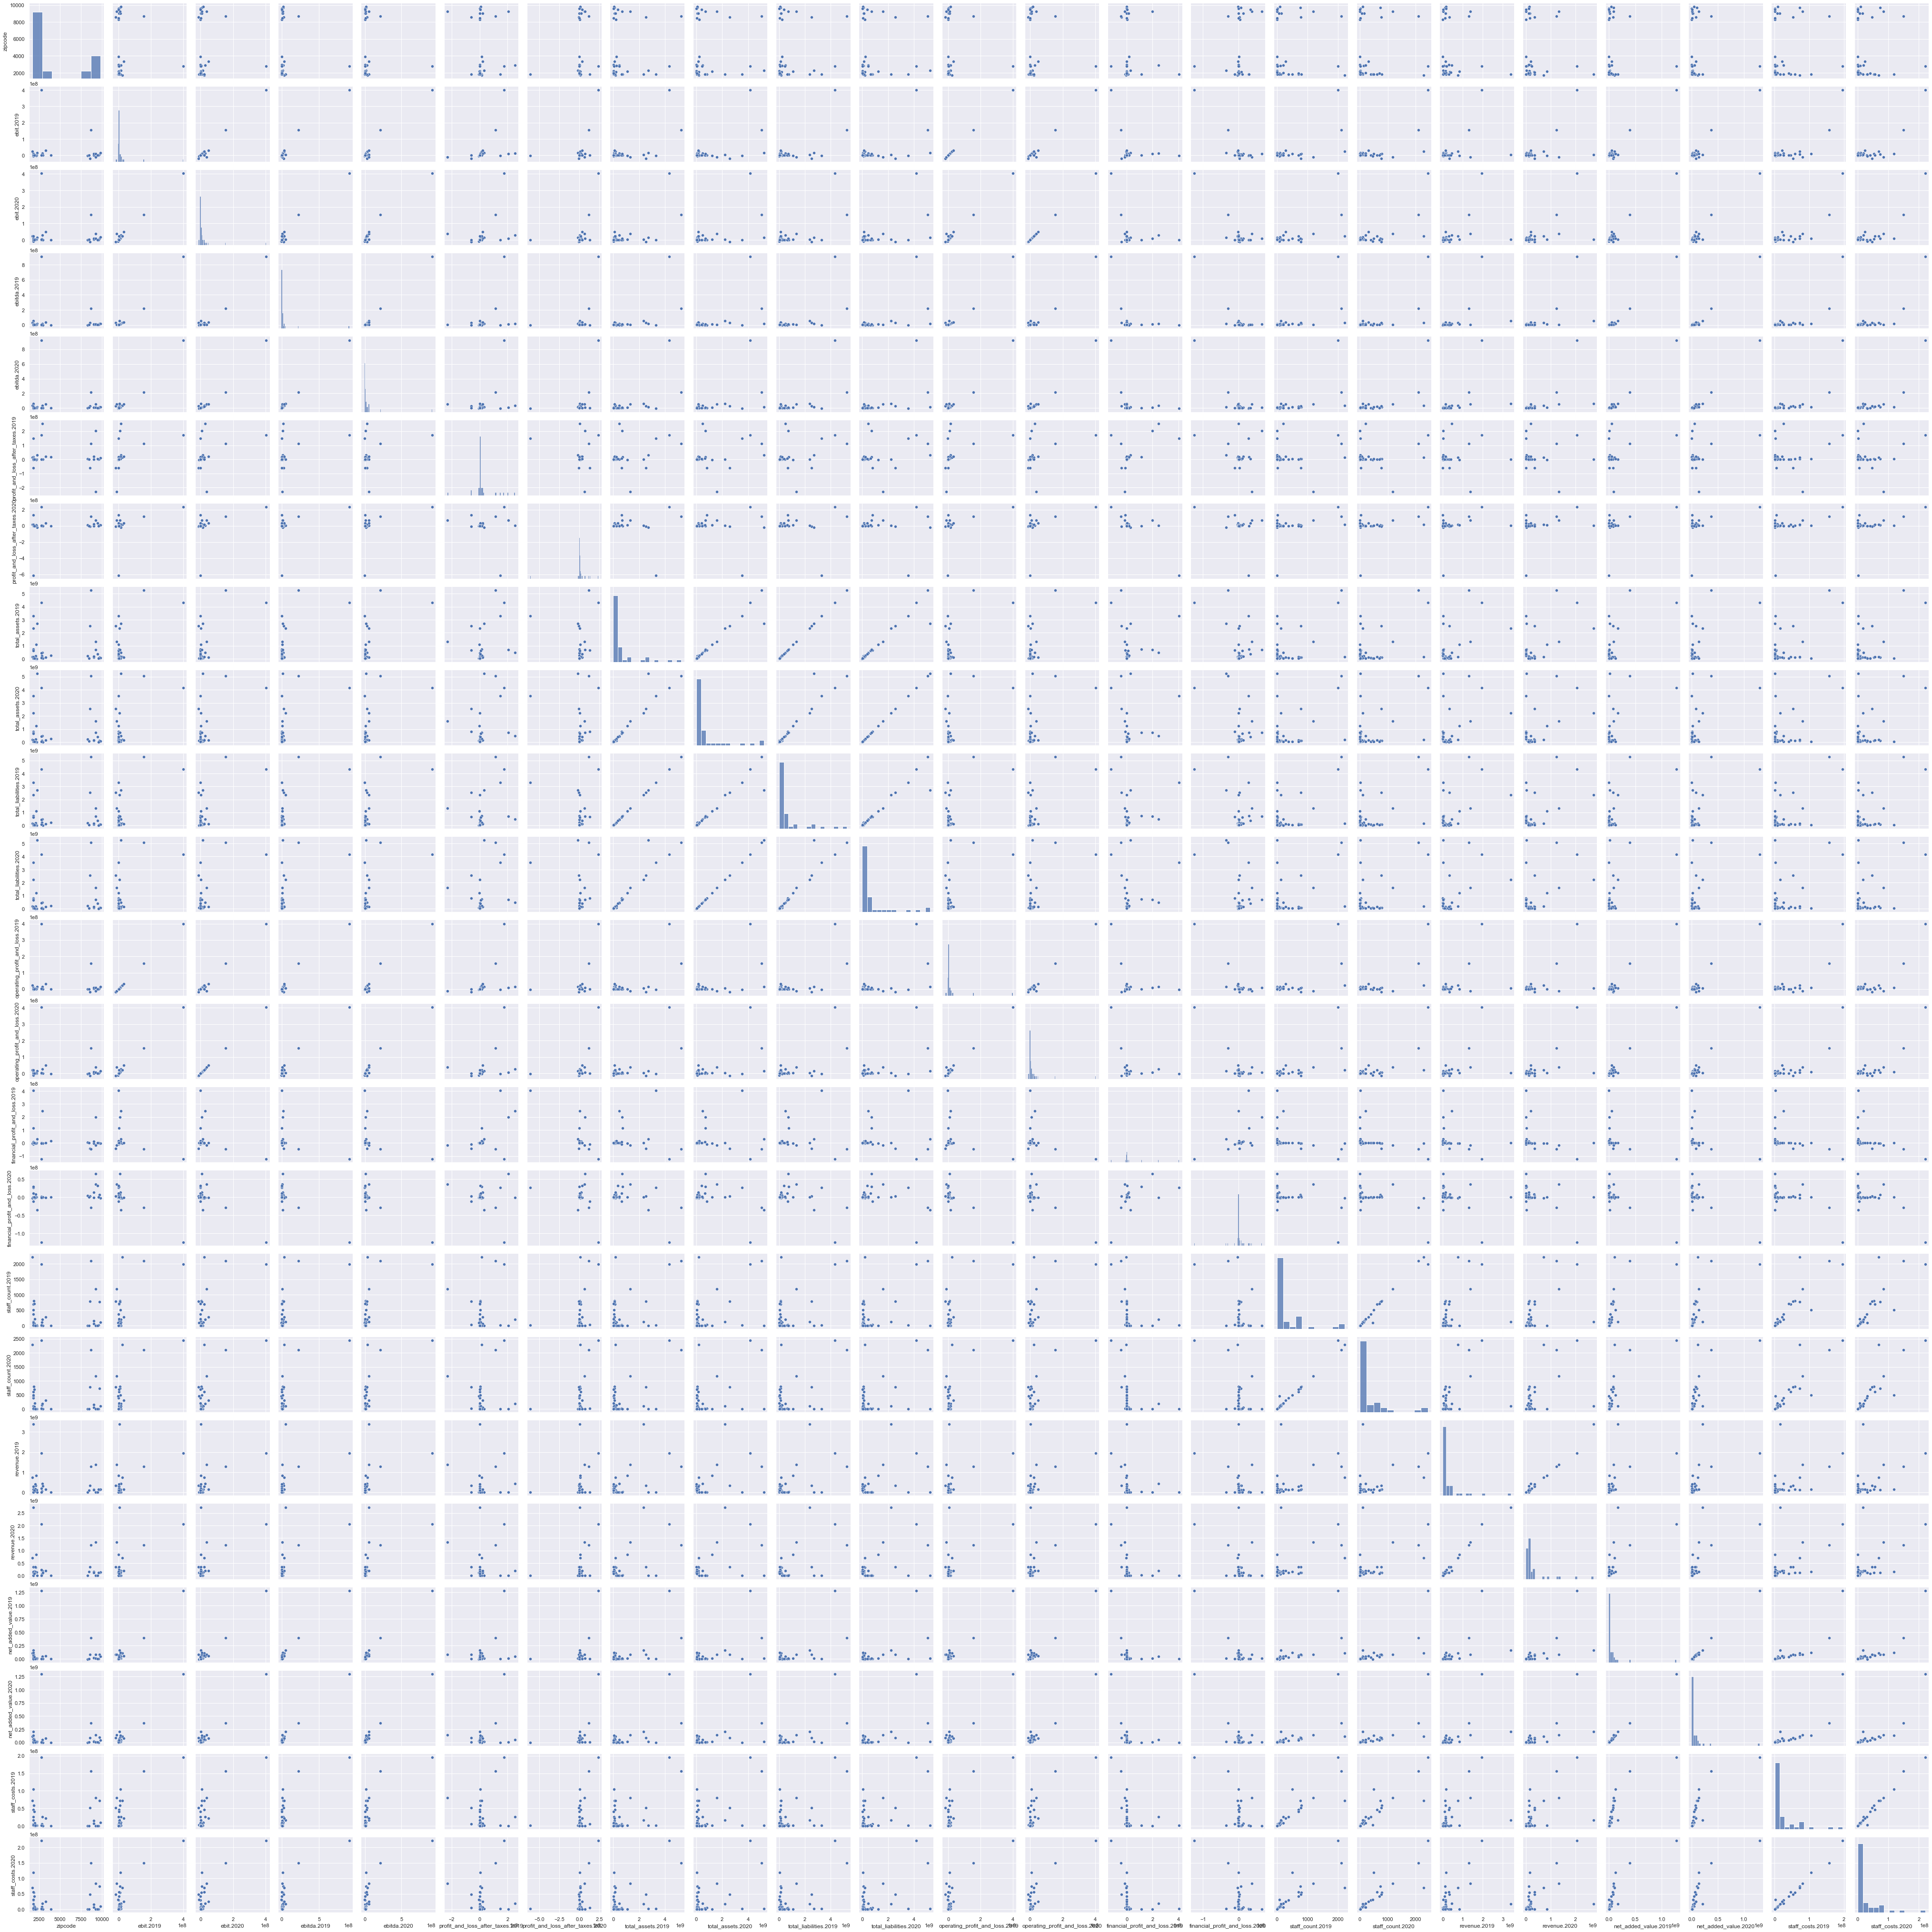

In [108]:
#  Visualize the data using seaborn Pairplots

g = sns.pairplot(df_NVery_large)